In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#### Loading Data
Loading train, test data and display first 5 rows

In [2]:
train = pd.read_json("~/Documents/Kaggle/Twosigma/train.json")
train.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
test = pd.read_json("~/Documents/Kaggle/Twosigma/test.json")
test.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


### Data Exploration

A cursory investigation of the data  set to see how many rows and columns, data types

In [4]:
print ("Train rows:", train.shape[0])
print ("Train columns:", train.shape[1])

Train rows: 49352
Train columns: 15


In [5]:
print ("Test rows:", test.shape[0])
print ("Test columns:", test.shape[1])

Test rows: 74659
Test columns: 14


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


The dataset has numerical, text, categorical and images as input features.

Looking at the preliminary statistics of the numeric features

In [7]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


There are no missing values in the numeric features.

### Investigating the features

#### Interest level distribution
Interest level is the target feature. It is a categorical variable with 3 classes - Low, Medium and High

[<matplotlib.text.Text at 0x12e435748>, <matplotlib.text.Text at 0x12d73a710>]

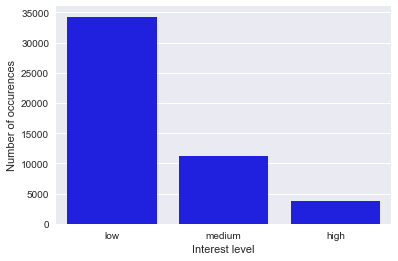

In [8]:
interest = train['interest_level'].value_counts()
ax = sns.barplot(interest.index, interest.values , color='blue')
ax.set(xlabel='Interest level', ylabel='Number of occurences')

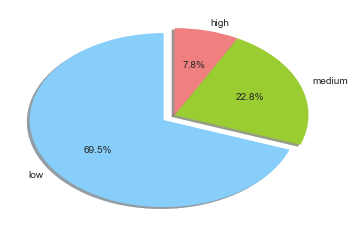

In [9]:
# pie chart
plt.pie(interest, explode=[0.1,0,0],
        labels=['low', 'medium', 'high'], 
        colors= ['lightskyblue', 'yellowgreen', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

A majority (69.5%) of the rental listings have 'low' interest level, followed by 22.8%  'medium' interest level and only 7.8%'high' interest level.

#### Bathrooms

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64


[<matplotlib.text.Text at 0x134e086d8>, <matplotlib.text.Text at 0x13463de80>]

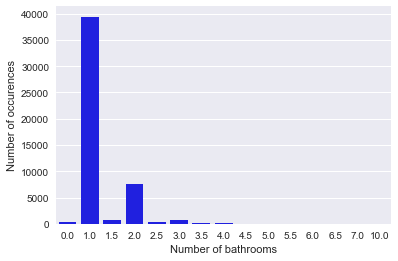

In [10]:
bath = train['bathrooms'].value_counts()
print (bath)
ax = sns.barplot(bath.index, bath.values , color='blue')
ax.set(xlabel='Number of bathrooms', ylabel='Number of occurences')

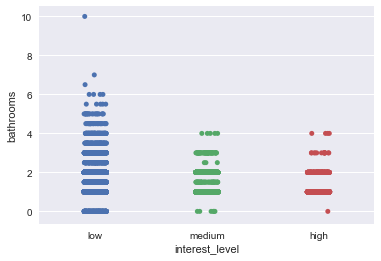

In [11]:
sns.stripplot(y="bathrooms", x="interest_level",data=train,jitter=True, order = ['low', 'medium', 'high']);

Majority of the listings have 1 bathroom. There is one listing with 10 bathrooms, which is an outlier. We can remove it and plot again.

In [12]:
# Removing bathroom outlier
train = train[train["bathrooms"] != 10]
print (train.shape)

(49351, 15)


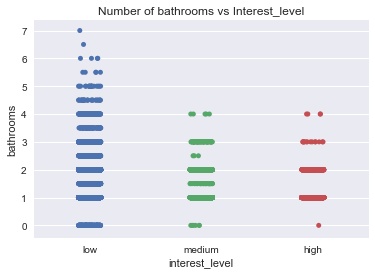

In [13]:
sns.stripplot(y="bathrooms", x="interest_level",data=train,jitter=True,order= ['low', 'medium', 'high'])
plt.title("Number of bathrooms vs Interest_level")

Most of the medium and high interest listings have 1-3 bathrooms.

#### Bedrooms

1    15752
2    14622
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64


[<matplotlib.text.Text at 0x12cddad68>, <matplotlib.text.Text at 0x134dd2b00>]

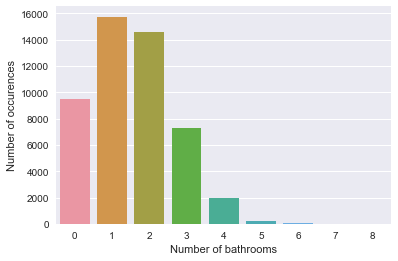

In [14]:
bed = train['bedrooms'].value_counts()
print (bed)
ax = sns.barplot(bed.index, bed.values)
ax.set(xlabel='Number of bathrooms', ylabel='Number of occurences')

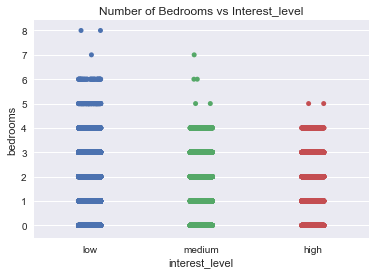

In [15]:
order = ['low', 'medium', 'high']
sns.stripplot(y="bedrooms", x="interest_level",data=train,jitter=True,order= ['low', 'medium', 'high']);
plt.title("Number of Bedrooms vs Interest_level")

The distribution of number of bedrooms across different interest levels looks similar. Most of the medium and high interest listings have 0-4 bedrooms.

#### Price


In [16]:
train['price'].value_counts()
#train['price'].max()

2500     1106
3200      881
3000      840
2700      777
2400      772
2600      707
3500      691
2800      669
2300      643
3400      637
2200      630
3300      611
3100      590
2100      585
2900      561
4000      536
3600      514
2000      508
2750      506
2350      487
2650      480
4500      471
1900      455
5000      454
2995      448
2850      445
2450      443
2950      405
1850      404
2550      368
         ... 
6639        1
2605        1
2489        1
4686        1
6555        1
6799        1
4442        1
2797        1
2713        1
4762        1
3594        1
6811        1
11325       1
3658        1
1048        1
3722        1
2969        1
3786        1
1739        1
5865        1
5897        1
7035        1
4922        1
6939        1
10095       1
1931        1
4858        1
58020       1
2027        1
8340        1
Name: price, dtype: int64

In [17]:
print (train.shape[0])

49351


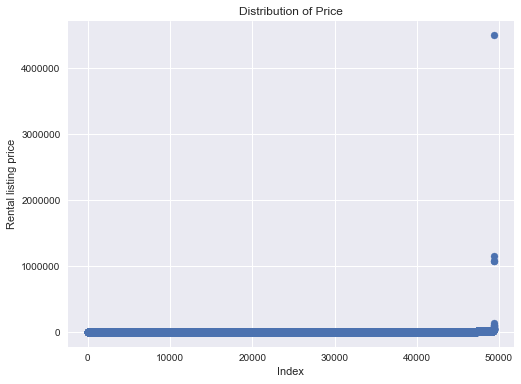

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.price.values))
plt.title("Distribution of Price");
plt.ylabel("Rental listing price")
plt.xlabel("Index")

We have some outliers in the price. Removing these outliers and plotting again

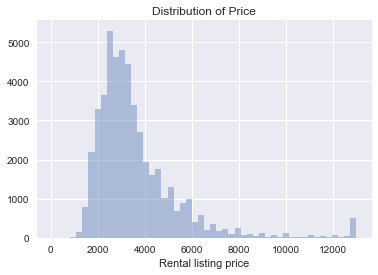

In [19]:
ulimit = np.percentile(train.price.values, 99)
train['price'].ix[train['price']>ulimit] = ulimit
sns.distplot(train.price.values, kde = False)
plt.title("Distribution of Price");
plt.xlabel("Rental listing price")

In [20]:
# Since price is right skewed, doing a log transformation.
train['logprice'] =  np.log(train.price)
test['logprice'] =  np.log(test.price)

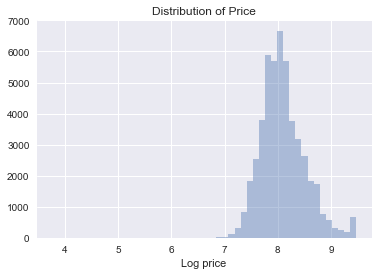

In [21]:
sns.distplot(train.logprice.values, kde = False)
plt.title("Distribution of Price");
plt.xlabel("Log price")

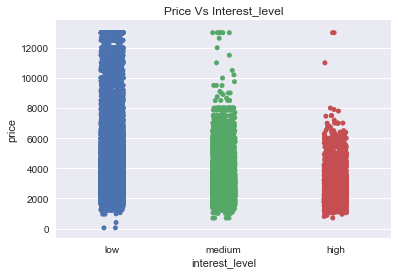

In [22]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

Most of the medium and high interest listings have prices in the range $1000 - $6000

### Created date
Splitting the date into date, month, year and hour to use as separate features.

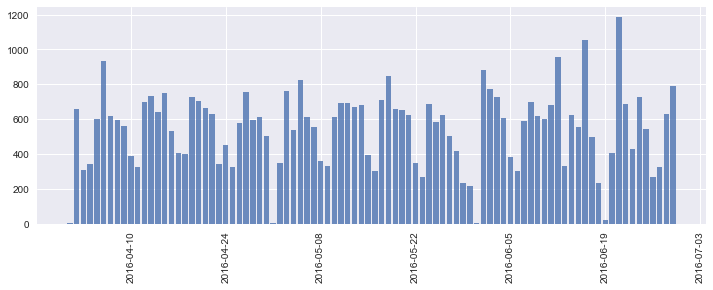

In [23]:
train["created"] = pd.to_datetime(train["created"])
train["date_created"] = train["created"].dt.date
train["day_created"] = train["created"].dt.day
train["month_created"] = train["created"].dt.month
train["hour_created"] = train["created"].dt.hour

count_date = train['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(count_date.index, count_date.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

The training dataset has rental listing data from April - June 2016. Let us know check the data range in the test dataset

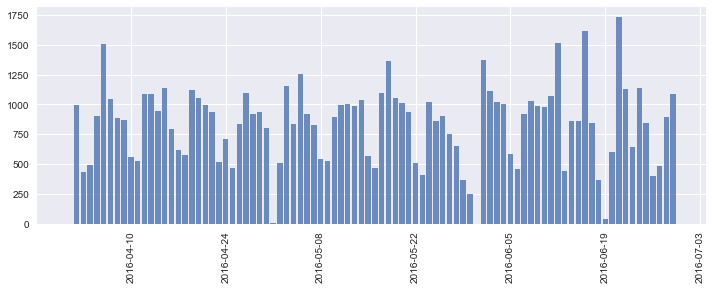

In [24]:
test["created"] = pd.to_datetime(test["created"])
test["date_created"] = test["created"].dt.date
test["day_created"] = test["created"].dt.day
test["month_created"] = test["created"].dt.month
test["hour_created"] = test["created"].dt.hour

count_date = test['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(count_date.index, count_date.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

The test dataset also has rental listing data in the same time frame as training data from April -  June 2016

#### Feature Engineering
Creating new numeric features from existing text/categorical features:
1. num_photos = number of photos for each listing. We assume that more number of photos in a listing could generate high interest
2. num_features = number of features for each listing. We assume that more number of features in a listing could generate high interest
3. num_description = number of words in the description of each listing. We assume that more number of words could generate high interest

In [25]:
# creating new numeric features
train['num_photos'] = train['photos'].apply(len)
test['num_photos'] = test['photos'].apply(len)

train['num_features'] = train['features'].apply(len)
test['num_features'] = test['features'].apply(len)

train['num_description'] = train['description'].apply(lambda x: len(x.split(' ')))
test['num_description'] = test['description'].apply(lambda x: len(x.split(' ')))

#### Distribution of number of photos

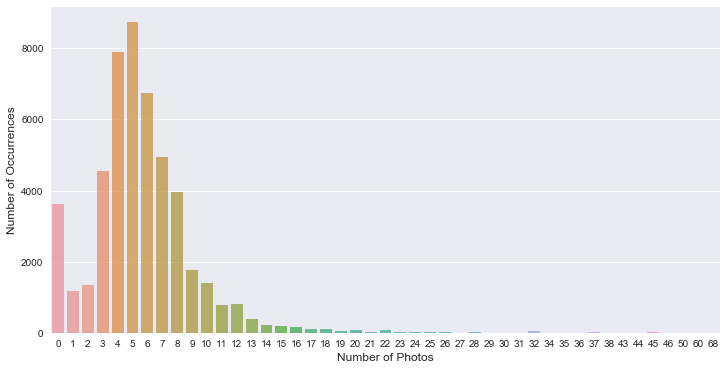

In [26]:
count_photos = train['num_photos'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count_photos.index, count_photos.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Most listings have 4-7 photos on an average.

### Distribution of number of features

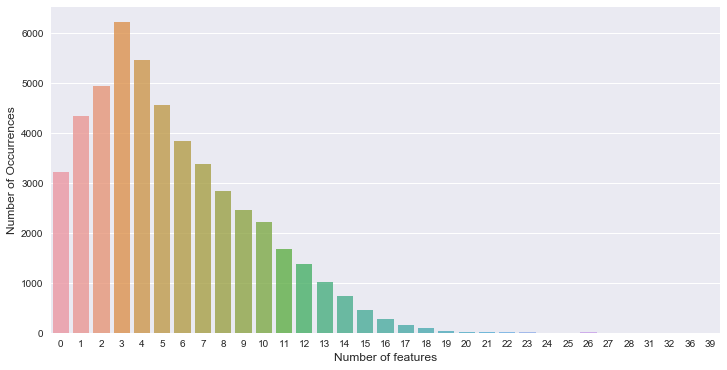

In [27]:
count_features = train['num_features'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count_features.index, count_features.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

Most of the listings have 2-5 features.

In [28]:
numeric_features = ["bathrooms", "bedrooms", "latitude", "longitude", "listing_id", "logprice",
             "num_photos", "num_features", "num_description",
              "month_created", "day_created", "hour_created"]


We have the following categorical features: display_address, manager_id, building_id listing_id 
Label encoding these features

In [29]:
from sklearn import preprocessing
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        if train[f].dtype=='object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train[f].values) + list(test[f].values))
            train[f] = lbl.transform(list(train[f].values))
            test[f] = lbl.transform(list(test[f].values))
            numeric_features.append(f)
print (train.shape)

(49351, 23)


In [30]:
print (train[numeric_features].head(4
                                   ))

        bathrooms  bedrooms  latitude  longitude  listing_id  logprice  \
10            1.5         3   40.7145   -73.9425     7211212  8.006368   
10000         1.0         2   40.7947   -73.9667     7150865  8.606119   
100004        1.0         1   40.7388   -74.0018     6887163  7.955074   
100007        1.0         1   40.7539   -73.9677     6888711  8.094073   

        num_photos  num_features  num_description  month_created  day_created  \
10               5             0               95              6           24   
10000           11             5                9              6           12   
100004           8             4               94              4           17   
100007           3             2               80              4           18   

        hour_created  display_address  manager_id  building_id  street_address  
10                 7            12282        1568         3797           23484  
10000             12             9080        1988         898

In [31]:
# Benchmark model
y_benchmark = pd.read_csv("~/Documents/Kaggle/Twosigma/sample_submission.csv")
y_benchmark.head(5)
y_benchmark.shape

(74659, 4)

In [32]:
y_benchmark = y_benchmark.drop('listing_id', axis=1)
#y_benchmark.head(35)
#print ("Log loss for benchmark model:", log_loss(y_train, y_benchmark))

,high,medium,low
0,0.077788,0.227529,0.694683
1,0.077788,0.227529,0.694683
2,0.077788,0.227529,0.694683
3,0.077788,0.227529,0.694683
4,0.077788,0.227529,0.694683
5,0.077788,0.227529,0.694683
6,0.077788,0.227529,0.694683
7,0.077788,0.227529,0.694683
8,0.077788,0.227529,0.694683
9,0.077788,0.227529,0.694683


In [33]:
# Splitting input and target features
X = train[numeric_features]
y = train["interest_level"]
X_test = test[numeric_features]
print (X_test.shape)

(74659, 16)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
# Splitting into train and validation 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [36]:
# Logistic Regression
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
y_val_pred_clf1 = clf1.predict_proba(X_val)
print (y_val_pred_clf1[0])
print ("Log loss for Logistic regression model:", log_loss(y_val, y_val_pred_clf1))
#print ("Accuracy for Logistic regression model:", accuracy_score(y_val, y_val_pred_clf1))

[ 0.06182754  0.69515647  0.24301599]
Log loss for Logistic regression model: 0.783898709695


In [37]:
# Random Forest
clf2 = RandomForestClassifier(n_estimators=100, random_state = 50)
clf2.fit(X_train, y_train)
y_val_pred_clf2 = clf2.predict_proba(X_val)
print ("Log loss for Random forest model:", log_loss(y_val, y_val_pred_clf2))

Log loss for Random forest model: 0.644479061334


In [39]:
# Using Gridsearch to optimize parameters for Random forest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
grid_search_params = { 'n_estimators' : [10, 100], 
                       'max_depth' : [5, 10, 15], 
                       'min_samples_split': (5, 10, 25),
                       "min_samples_leaf": [1, 5, 10],
                       "max_leaf_nodes": [None, 5, 10, 20]
                     }
clf2_opt = GridSearchCV(estimator = RandomForestClassifier(random_state = 50), param_grid=grid_search_params)
clf2_opt.fit(X_train, y_train)
y_val_pred_clf2_opt = clf2_opt.predict_proba(X_val)
print("Best params: ", clf2_opt.best_params_)
print("Best score: ", clf2_opt.best_score_)
print ("Log loss for Random forest model optimized with Grid search:", log_loss(y_val, y_val_pred_clf2_opt))

Best params:  {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 100, 'min_samples_split': 10, 'max_leaf_nodes': None}
Best score:  0.7265704154
Log loss for Random forest model optimized with Grid search: 0.608234844475


In [40]:
# predict output class probabilities for test data using the
# optimised random forest classifier
clf = RandomForestClassifier(max_leaf_nodes = None,
                             min_samples_split = 5,
                             max_depth = 15,
                             n_estimators = 100,
                             min_samples_leaf = 5,
                             random_state= 50
                            )
clf.fit(X_train, y_train)
y_test = clf.predict_proba(X_test)
print (y_test.shape)

(74659, 3)


In [43]:
# create dataframe to store the test output
y_test_prob = pd.DataFrame(data = y_test, columns=clf2_opt.best_estimator_.classes_)
print (y_test_prob.shape)

(74659, 3)


In [44]:
# Add "listing_id" column to the dataframe
y_test_prob['listing_id'] = X_test['listing_id'].values
y_test_prob = y_test_prob.reindex_axis(labels=['listing_id', 'high', 'medium', 'low'], axis=1)
y_test_prob.head(5)

,listing_id,high,medium,low
0,7142618,0.089353,0.334530,0.576117
1,7210040,0.037327,0.131719,0.830955
2,7103890,0.023890,0.196202,0.779908
3,7143442,0.100983,0.329690,0.569328
4,6860601,0.053775,0.299665,0.646560


In [45]:
# Convert dataframe to csv file
y_test_prob.to_csv("output.csv", index=False)

,importance
logprice,0.205715
building_id,0.112008
hour_created,0.071414
latitude,0.067211
longitude,0.065693
num_description,0.063752
bedrooms,0.061165
display_address,0.056603
manager_id,0.051518
listing_id,0.050296


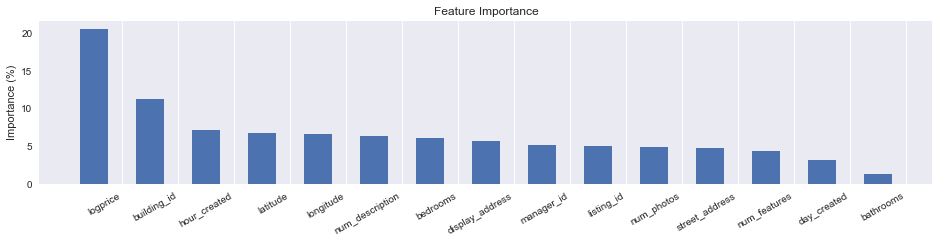

In [46]:
# Feature importance
relevance = pd.DataFrame([clf.feature_importances_], index=['importance'], columns = X_train.columns)
relevance = relevance[relevance > 0.01].dropna(axis=1).transpose().sort_values('importance', ascending = False)
display(relevance)

relevance_data = relevance['importance'] * 100
N = len(relevance_data)
index = np.arange(N)
width = 0.5

plt.figure(figsize=(16,3))
plt.bar(index, relevance_data, width)
plt.xticks(index + width, relevance.index, rotation=30, ha='right')
plt.ylabel('Importance (%)')
plt.title('Feature Importance')
plt.grid(which='major', axis='y')
plt.show()